向量化运算

In [115]:
#coding=utf-8
import numpy as np
import matplotlib.pylab as plt
import random
 
class NeuralNetwork(object):
    def __init__(self, sizes, act, act_derivative, cost_derivative):
        #sizes表示神经网络各层的神经元个数，第一层为输入层，最后一层为输出层
        #act为神经元的激活函数
        #act_derivative为激活函数的导数
        #cost_derivative为损失函数的导数
        self.num_layers = len(sizes)
        self.sizes = sizes
        self.biases = [np.random.randn(nueron_num, 1) for nueron_num in sizes[1:]]
        self.weights = [np.random.randn(next_layer_nueron_num, nueron_num)
            for nueron_num, next_layer_nueron_num in zip(sizes[:-1], sizes[1:])]
        self.act=act
        self.act_derivative=act_derivative
        self.cost_derivative=cost_derivative
        self._w = None
        self._g = None
        self._predict = None
 
    #正向传播,计算输出的结果啦
    def feedforward(self, a):
        for b, w in zip(self.biases, self.weights):
            a = self.act(np.dot(w, a)+b)
        return a
 
    #批量随机梯度下降算法
    def SGD(self, training_data, epochs, batch_size, learning_rate, y_true):
        #将训练样本training_data随机分为若干个长度为batch_size的batch
        #使用各个batch的数据不断调整参数，学习率为learning_rate
        #迭代epochs次
        n = len(training_data)
        for j in range(epochs):
            random.shuffle(training_data)
            # 进行数据的分割
            batches = [training_data[k:k+batch_size] for k in range(0, n, batch_size)]
            for batch in batches:
                # 接收更新完成的参数，进行打印
                weight_last, biase_last = self.update_batch(batch, learning_rate)
            print("Epoch {0} complete, total errors is {1}".format(j, np.sum((y_true.T-self._predict)**2)))
            
 
    def update_batch(self, batch, learning_rate):
        #根据一个batch中的训练样本，调整各个参数值
        nabla_b = [np.zeros(b.shape) for b in self.biases]
        nabla_w = [np.zeros(w.shape) for w in self.weights]
        for x, y in batch:
            delta_nabla_b, delta_nabla_w = self.backprop(x, y)
            nabla_b = [nb+dnb for nb, dnb in zip(nabla_b, delta_nabla_b)]
            nabla_w = [nw+dnw for nw, dnw in zip(nabla_w, delta_nabla_w)]
        #计算梯度，并调整各个参数值
        self.weights = [w-(learning_rate/len(batch))*nw for w, nw in zip(self.weights, nabla_w)]
        self.biases = [b-(learning_rate/len(batch))*nb for b, nb in zip(self.biases, nabla_b)]
        return self.weights[-1], self.biases[-1]
 
    #反向传播（重点）
    def backprop(self, x, y):
        #保存b和w的偏导数值
        nabla_g = [np.zeros(b.shape) for b in self.biases]
        nabla_w = [np.zeros(w.shape) for w in self.weights]
        #正向传播
        activation = x
        #保存每一层神经输出值
        activations = [x]
        #保存每一层神经输入值
        zs = []
        for b, w in zip(self.biases, self.weights):
            z = np.dot(w, activation)+b
            zs.append(z)
            activation = self.act(z)
            activations.append(activation)
        self._predict = np.array(activations[-1][0]).reshape(-1, 1)
        #反向传播得到各个参数的偏导数值
        g = self.cost_derivative(activations[-1], y) * self.act_derivative(zs[-1])
        nabla_g[-1] = g
        nabla_w[-1] = np.dot(g, activations[-2].transpose())
        #反向逐层计算
        for l in range(2, self.num_layers):
            z = zs[-l]
            sp = self.act_derivative(z)
            #反向逐层求参数偏导
            g = np.dot(self.weights[-l+1].transpose(), g) * sp
            nabla_g[-l] = g
            nabla_w[-l] = np.dot(g, activations[-l-1].transpose())
        return (nabla_g, nabla_w)

In [73]:
# 损失函数的偏导数
def cost_derivative(output_activations, y):
    return 2*(output_activations-y)
 
# sigmoid函数
def sigmoid(z):
    return 1.0/(1.0+np.exp(-z))
 
# sigmoid函数的导数
def sigmoid_derivative(z):
    return sigmoid(z)*(1-sigmoid(z))

Epoch 0 complete, total errors is 30.20551440201369
Epoch 1 complete, total errors is 26.926971266682735
Epoch 2 complete, total errors is 27.724946229859235
Epoch 3 complete, total errors is 27.715262697206505
Epoch 4 complete, total errors is 26.613734538031906
Epoch 5 complete, total errors is 26.32403977796019
Epoch 6 complete, total errors is 27.018054955038515
Epoch 7 complete, total errors is 26.794262790677653
Epoch 8 complete, total errors is 26.372081853024522
Epoch 9 complete, total errors is 26.782767420193057
Epoch 10 complete, total errors is 26.548696305066553
Epoch 11 complete, total errors is 26.305325325306278
Epoch 12 complete, total errors is 26.51838830033944
Epoch 13 complete, total errors is 26.46832448040494
Epoch 14 complete, total errors is 26.39580390776873
Epoch 15 complete, total errors is 26.84705600211057
Epoch 16 complete, total errors is 26.382161570214105
Epoch 17 complete, total errors is 26.42659983287196
Epoch 18 complete, total errors is 26.3980755

Epoch 168 complete, total errors is 26.303571159506106
Epoch 169 complete, total errors is 26.315621411135517
Epoch 170 complete, total errors is 26.315365085468663
Epoch 171 complete, total errors is 26.329720183012075
Epoch 172 complete, total errors is 26.304973964891857
Epoch 173 complete, total errors is 26.30380455941927
Epoch 174 complete, total errors is 26.30689593670007
Epoch 175 complete, total errors is 26.304155297493146
Epoch 176 complete, total errors is 26.310186757018563
Epoch 177 complete, total errors is 26.3047500098045
Epoch 178 complete, total errors is 26.30312217931051
Epoch 179 complete, total errors is 26.321343344123818
Epoch 180 complete, total errors is 26.307160609948426
Epoch 181 complete, total errors is 26.311836718859702
Epoch 182 complete, total errors is 26.308586009313693
Epoch 183 complete, total errors is 26.315925722123573
Epoch 184 complete, total errors is 26.304415558925676
Epoch 185 complete, total errors is 26.31904246955906
Epoch 186 comple

Epoch 331 complete, total errors is 26.30568098305675
Epoch 332 complete, total errors is 26.315510659259807
Epoch 333 complete, total errors is 26.309985422500837
Epoch 334 complete, total errors is 26.311511853102992
Epoch 335 complete, total errors is 26.313580171767867
Epoch 336 complete, total errors is 26.305494757510886
Epoch 337 complete, total errors is 26.31222311333025
Epoch 338 complete, total errors is 26.30834924226857
Epoch 339 complete, total errors is 26.30903645934683
Epoch 340 complete, total errors is 26.31321070179269
Epoch 341 complete, total errors is 26.30381450728007
Epoch 342 complete, total errors is 26.331691293914098
Epoch 343 complete, total errors is 26.303173881510766
Epoch 344 complete, total errors is 26.30284561322817
Epoch 345 complete, total errors is 26.308051398665697
Epoch 346 complete, total errors is 26.30747244972183
Epoch 347 complete, total errors is 26.309227033624197
Epoch 348 complete, total errors is 26.309332450319182
Epoch 349 complete

Epoch 503 complete, total errors is 26.421951062454482
Epoch 504 complete, total errors is 26.30326569872673
Epoch 505 complete, total errors is 26.3985671341254
Epoch 506 complete, total errors is 26.315426902904367
Epoch 507 complete, total errors is 26.338432257643483
Epoch 508 complete, total errors is 26.318441736116313
Epoch 509 complete, total errors is 26.358417579150725
Epoch 510 complete, total errors is 26.407619359679266
Epoch 511 complete, total errors is 26.302703884068908
Epoch 512 complete, total errors is 26.36228312383736
Epoch 513 complete, total errors is 26.83086936316584
Epoch 514 complete, total errors is 26.42713673156538
Epoch 515 complete, total errors is 26.307633274976794
Epoch 516 complete, total errors is 26.37914950125971
Epoch 517 complete, total errors is 26.466413247096526
Epoch 518 complete, total errors is 26.36870796260683
Epoch 519 complete, total errors is 26.418768461499965
Epoch 520 complete, total errors is 26.366589314219404
Epoch 521 complete

Epoch 657 complete, total errors is 26.33696912143624
Epoch 658 complete, total errors is 27.06944584390837
Epoch 659 complete, total errors is 26.67609675424614
Epoch 660 complete, total errors is 26.731753125687412
Epoch 661 complete, total errors is 26.70566186044247
Epoch 662 complete, total errors is 26.574140761436748
Epoch 663 complete, total errors is 26.729418155293775
Epoch 664 complete, total errors is 26.80563174233721
Epoch 665 complete, total errors is 26.428661504991407
Epoch 666 complete, total errors is 26.760647570559826
Epoch 667 complete, total errors is 26.786280338228373
Epoch 668 complete, total errors is 32.811239913007284
Epoch 669 complete, total errors is 26.704057747966743
Epoch 670 complete, total errors is 30.485345390414928
Epoch 671 complete, total errors is 26.640726655427862
Epoch 672 complete, total errors is 26.667152412119588
Epoch 673 complete, total errors is 26.731772132279044
Epoch 674 complete, total errors is 26.822597585221573
Epoch 675 compl

Epoch 833 complete, total errors is 26.965162209449296
Epoch 834 complete, total errors is 27.229799128742854
Epoch 835 complete, total errors is 26.321879106967437
Epoch 836 complete, total errors is 26.310157314337914
Epoch 837 complete, total errors is 27.033636968016758
Epoch 838 complete, total errors is 41.59849151937739
Epoch 839 complete, total errors is 27.079467687202616
Epoch 840 complete, total errors is 26.83514787056277
Epoch 841 complete, total errors is 30.922796064132648
Epoch 842 complete, total errors is 27.181724096477197
Epoch 843 complete, total errors is 39.80326216709802
Epoch 844 complete, total errors is 27.07120029958226
Epoch 845 complete, total errors is 27.05799059950707
Epoch 846 complete, total errors is 27.211693811907658
Epoch 847 complete, total errors is 27.070778513219107
Epoch 848 complete, total errors is 27.168294320734876
Epoch 849 complete, total errors is 26.52591412316687
Epoch 850 complete, total errors is 26.919345558280813
Epoch 851 comple

Epoch 995 complete, total errors is 27.147219452341865
Epoch 996 complete, total errors is 27.388213256148035
Epoch 997 complete, total errors is 27.173248358897204
Epoch 998 complete, total errors is 34.64938063644576
Epoch 999 complete, total errors is 27.272556919982442
Epoch 1000 complete, total errors is 47.30230043723618
Epoch 1001 complete, total errors is 27.37632830112088
Epoch 1002 complete, total errors is 27.373724912058112
Epoch 1003 complete, total errors is 27.11864380815023
Epoch 1004 complete, total errors is 27.398131264385505
Epoch 1005 complete, total errors is 27.207783014670518
Epoch 1006 complete, total errors is 27.278423003650428
Epoch 1007 complete, total errors is 27.175788230593994
Epoch 1008 complete, total errors is 27.16924394649775
Epoch 1009 complete, total errors is 27.200164878235544
Epoch 1010 complete, total errors is 47.576017524072
Epoch 1011 complete, total errors is 27.14201288645608
Epoch 1012 complete, total errors is 27.381912182046122
Epoch 

Epoch 1158 complete, total errors is 27.3524219656647
Epoch 1159 complete, total errors is 27.406513475871794
Epoch 1160 complete, total errors is 26.927319423077577
Epoch 1161 complete, total errors is 27.369742484925467
Epoch 1162 complete, total errors is 26.44870115234783
Epoch 1163 complete, total errors is 27.650436017739313
Epoch 1164 complete, total errors is 27.220120256943808
Epoch 1165 complete, total errors is 26.46317923763823
Epoch 1166 complete, total errors is 27.291824214167224
Epoch 1167 complete, total errors is 27.53139421608857
Epoch 1168 complete, total errors is 27.436238494629443
Epoch 1169 complete, total errors is 50.43129442829122
Epoch 1170 complete, total errors is 27.45753712127864
Epoch 1171 complete, total errors is 26.642432649379572
Epoch 1172 complete, total errors is 27.40540475282991
Epoch 1173 complete, total errors is 27.297045413635423
Epoch 1174 complete, total errors is 27.479916111632285
Epoch 1175 complete, total errors is 27.312920641139556


Epoch 1334 complete, total errors is 27.527675474311117
Epoch 1335 complete, total errors is 27.33934705084109
Epoch 1336 complete, total errors is 27.379240405224163
Epoch 1337 complete, total errors is 27.53007337658592
Epoch 1338 complete, total errors is 27.00615607218821
Epoch 1339 complete, total errors is 38.34354116026591
Epoch 1340 complete, total errors is 27.348309029334104
Epoch 1341 complete, total errors is 27.296912408563042
Epoch 1342 complete, total errors is 27.17289081182205
Epoch 1343 complete, total errors is 27.50787419830197
Epoch 1344 complete, total errors is 27.288733888416054
Epoch 1345 complete, total errors is 26.86129313143364
Epoch 1346 complete, total errors is 26.32055436989572
Epoch 1347 complete, total errors is 26.998540464299012
Epoch 1348 complete, total errors is 27.60980243313168
Epoch 1349 complete, total errors is 27.411677230143
Epoch 1350 complete, total errors is 27.50316880091497
Epoch 1351 complete, total errors is 26.763955651702517
Epoch

Epoch 1491 complete, total errors is 27.672590726695596
Epoch 1492 complete, total errors is 49.86946193367255
Epoch 1493 complete, total errors is 27.405763717407723
Epoch 1494 complete, total errors is 26.828725511318382
Epoch 1495 complete, total errors is 27.390413253684926
Epoch 1496 complete, total errors is 26.91528762087485
Epoch 1497 complete, total errors is 27.30929571330189
Epoch 1498 complete, total errors is 27.45141048165857
Epoch 1499 complete, total errors is 53.18340537892911
Epoch 1500 complete, total errors is 27.577667090149554
Epoch 1501 complete, total errors is 27.48712709276328
Epoch 1502 complete, total errors is 27.526635198385737
Epoch 1503 complete, total errors is 27.026611915695486
Epoch 1504 complete, total errors is 27.511085258345364
Epoch 1505 complete, total errors is 26.76114150137054
Epoch 1506 complete, total errors is 27.541453834374042
Epoch 1507 complete, total errors is 27.24022002741212
Epoch 1508 complete, total errors is 27.356144647534602


Epoch 1653 complete, total errors is 26.658431811352315
Epoch 1654 complete, total errors is 27.461028476499685
Epoch 1655 complete, total errors is 27.333074606345672
Epoch 1656 complete, total errors is 27.309490758292426
Epoch 1657 complete, total errors is 39.27138724716451
Epoch 1658 complete, total errors is 27.408959099141093
Epoch 1659 complete, total errors is 27.470376411236437
Epoch 1660 complete, total errors is 27.456073664686794
Epoch 1661 complete, total errors is 27.439296868027213
Epoch 1662 complete, total errors is 37.164129172654086
Epoch 1663 complete, total errors is 30.42864606169715
Epoch 1664 complete, total errors is 27.691818084142927
Epoch 1665 complete, total errors is 27.37107902607563
Epoch 1666 complete, total errors is 26.37895857893455
Epoch 1667 complete, total errors is 27.577365321947546
Epoch 1668 complete, total errors is 51.54747228920089
Epoch 1669 complete, total errors is 27.425269187439135
Epoch 1670 complete, total errors is 27.5985136211978

Epoch 1840 complete, total errors is 27.803367092547134
Epoch 1841 complete, total errors is 37.48570190909856
Epoch 1842 complete, total errors is 27.543906366538504
Epoch 1843 complete, total errors is 27.663372820025927
Epoch 1844 complete, total errors is 27.344654224513466
Epoch 1845 complete, total errors is 27.14188359708291
Epoch 1846 complete, total errors is 27.55383991457412
Epoch 1847 complete, total errors is 27.567131448032665
Epoch 1848 complete, total errors is 27.598630683029853
Epoch 1849 complete, total errors is 27.197502061136113
Epoch 1850 complete, total errors is 27.625012624112014
Epoch 1851 complete, total errors is 27.813252300081032
Epoch 1852 complete, total errors is 27.2340009385087
Epoch 1853 complete, total errors is 27.293145480863448
Epoch 1854 complete, total errors is 27.354711584465228
Epoch 1855 complete, total errors is 27.53074860050081
Epoch 1856 complete, total errors is 56.463210565870696
Epoch 1857 complete, total errors is 27.38149828804112

Epoch 2027 complete, total errors is 27.387992106551593
Epoch 2028 complete, total errors is 27.477987712308014
Epoch 2029 complete, total errors is 27.454468451150476
Epoch 2030 complete, total errors is 27.467846095557633
Epoch 2031 complete, total errors is 57.33363919273095
Epoch 2032 complete, total errors is 27.57949058791554
Epoch 2033 complete, total errors is 27.441663082995163
Epoch 2034 complete, total errors is 27.40558039152797
Epoch 2035 complete, total errors is 26.44915883673985
Epoch 2036 complete, total errors is 27.34094374347052
Epoch 2037 complete, total errors is 27.49350051028604
Epoch 2038 complete, total errors is 27.522728645212197
Epoch 2039 complete, total errors is 27.204341352672916
Epoch 2040 complete, total errors is 27.500131504605367
Epoch 2041 complete, total errors is 27.33621821948993
Epoch 2042 complete, total errors is 27.403170649853855
Epoch 2043 complete, total errors is 30.227574505379543
Epoch 2044 complete, total errors is 27.500664048958964

Epoch 2218 complete, total errors is 27.36084738803946
Epoch 2219 complete, total errors is 27.477991157463826
Epoch 2220 complete, total errors is 57.457451648256296
Epoch 2221 complete, total errors is 27.015581068137323
Epoch 2222 complete, total errors is 58.359354671614085
Epoch 2223 complete, total errors is 27.327715387790562
Epoch 2224 complete, total errors is 27.4068311067145
Epoch 2225 complete, total errors is 27.593340540707153
Epoch 2226 complete, total errors is 27.410394080998618
Epoch 2227 complete, total errors is 27.251496845549788
Epoch 2228 complete, total errors is 27.499925939701743
Epoch 2229 complete, total errors is 27.43322157040672
Epoch 2230 complete, total errors is 27.49406040110908
Epoch 2231 complete, total errors is 27.525343032418213
Epoch 2232 complete, total errors is 26.538930229681604
Epoch 2233 complete, total errors is 27.387868218640275
Epoch 2234 complete, total errors is 27.518090418811063
Epoch 2235 complete, total errors is 27.3648914545888

Epoch 2400 complete, total errors is 26.317749461721533
Epoch 2401 complete, total errors is 28.606194611174157
Epoch 2402 complete, total errors is 27.397059878296737
Epoch 2403 complete, total errors is 27.35638632788518
Epoch 2404 complete, total errors is 26.393190238077334
Epoch 2405 complete, total errors is 27.401303992299027
Epoch 2406 complete, total errors is 30.408963709284464
Epoch 2407 complete, total errors is 35.647881744030556
Epoch 2408 complete, total errors is 27.350590836712257
Epoch 2409 complete, total errors is 32.85443435107417
Epoch 2410 complete, total errors is 27.318943522281238
Epoch 2411 complete, total errors is 27.50752676099949
Epoch 2412 complete, total errors is 27.70174148796441
Epoch 2413 complete, total errors is 27.46153154185711
Epoch 2414 complete, total errors is 27.897382295132154
Epoch 2415 complete, total errors is 27.28513115383467
Epoch 2416 complete, total errors is 53.06373149637204
Epoch 2417 complete, total errors is 27.566412734130203

Epoch 2553 complete, total errors is 27.424617537233814
Epoch 2554 complete, total errors is 27.455381792544557
Epoch 2555 complete, total errors is 27.6076505233157
Epoch 2556 complete, total errors is 26.314362691224026
Epoch 2557 complete, total errors is 27.2256451568215
Epoch 2558 complete, total errors is 27.308885521901622
Epoch 2559 complete, total errors is 27.78017573265933
Epoch 2560 complete, total errors is 27.7079722778466
Epoch 2561 complete, total errors is 27.320688732529597
Epoch 2562 complete, total errors is 54.06952115674737
Epoch 2563 complete, total errors is 39.43040695939203
Epoch 2564 complete, total errors is 26.870739375011937
Epoch 2565 complete, total errors is 27.620662457735936
Epoch 2566 complete, total errors is 27.340806094741485
Epoch 2567 complete, total errors is 27.583047999036484
Epoch 2568 complete, total errors is 27.23498169214153
Epoch 2569 complete, total errors is 27.576015032938717
Epoch 2570 complete, total errors is 26.447234277730963
Ep

Epoch 2729 complete, total errors is 36.190629972209685
Epoch 2730 complete, total errors is 27.494322081542666
Epoch 2731 complete, total errors is 26.392831832619052
Epoch 2732 complete, total errors is 26.563041925610946
Epoch 2733 complete, total errors is 27.25259130740362
Epoch 2734 complete, total errors is 39.063984325661906
Epoch 2735 complete, total errors is 27.625654596337213
Epoch 2736 complete, total errors is 27.39832000913161
Epoch 2737 complete, total errors is 27.697509564657285
Epoch 2738 complete, total errors is 27.25492201089458
Epoch 2739 complete, total errors is 27.80610929275553
Epoch 2740 complete, total errors is 46.40359209044584
Epoch 2741 complete, total errors is 27.51979094213773
Epoch 2742 complete, total errors is 27.311030975441476
Epoch 2743 complete, total errors is 27.460310904051827
Epoch 2744 complete, total errors is 27.44367308770632
Epoch 2745 complete, total errors is 27.64998420809068
Epoch 2746 complete, total errors is 26.34012946213947
E

Epoch 2877 complete, total errors is 26.505843256078833
Epoch 2878 complete, total errors is 27.255905225730487
Epoch 2879 complete, total errors is 27.828935362585327
Epoch 2880 complete, total errors is 27.58542986512942
Epoch 2881 complete, total errors is 27.45275991166877
Epoch 2882 complete, total errors is 27.399017394761252
Epoch 2883 complete, total errors is 26.72735754113431
Epoch 2884 complete, total errors is 27.271230631494426
Epoch 2885 complete, total errors is 39.67198901635959
Epoch 2886 complete, total errors is 26.322711021187047
Epoch 2887 complete, total errors is 27.621208512114073
Epoch 2888 complete, total errors is 27.479860595062412
Epoch 2889 complete, total errors is 27.366172157396505
Epoch 2890 complete, total errors is 27.770395833645324
Epoch 2891 complete, total errors is 27.327428780405235
Epoch 2892 complete, total errors is 27.38701373425446
Epoch 2893 complete, total errors is 30.415001243962422
Epoch 2894 complete, total errors is 27.4706686238908

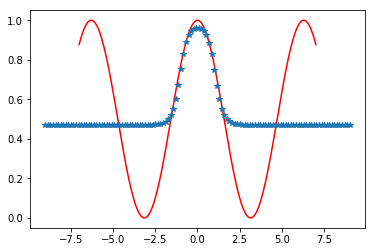

In [116]:
#创建一个3层的全连接神经网络，每层的神经元个数为 1, 3, 1
#其中第一层为输入层，最后一层为输出层
network=NeuralNetwork([1,3, 1],sigmoid,sigmoid_derivative,cost_derivative)
 
#训练集样本
x = np.array([np.linspace(-7, 7, 200)]).T
y = (np.cos(x)+1)/2
 
#使用批量随机梯度下降算法对模型进行训练
#迭代288次；每次随机抽取40个样本作为一个batch；学习率设为0.3
training_data=[(np.array([x_value]),np.array([y_value])) for x_value,y_value in zip(x,y)]
network.SGD(training_data,3000,40,0.3, y)
 
#测试集样本
x_test = np.array([np.linspace(-9, 9, 120)])
#测试集结果
y_predict = network.feedforward(x_test)
 
#图示对比训练集和测试集数据
plt.plot(x,y,'r',x_test.T,y_predict.T,'*')
plt.show()

END